## Import Necessary Libraries
### We begin by importing the necessary libraries for data analysis and visualization

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Load the Datasets

In [12]:
iot_coverage = pd.read_csv('5g_coverage.csv')
quality_of_service = pd.read_csv('Quality_of_Service_5G.csv')
maternal_health_risk = pd.read_csv('Maternal_Health_Risk_Dataset.csv')
smart_city_index = pd.read_csv('Smart_City_index_headers.csv')

iot_coverage.head(), quality_of_service.head(), maternal_health_risk.head(), smart_city_index.head()

(        operator          city_name deployment_type                   status  \
 0        Ooredoo  Abdullah al-Salem           5G NR  Commercial Availability   
 1          Optus           Canberra           5G NR  Commercial Availability   
 2          Optus             Sydney           5G NR  Commercial Availability   
 3  AT&T Mobility   Jacksonville, FL           5G NR  Commercial Availability   
 4  AT&T Mobility        Atlanta, GA           5G NR  Commercial Availability   
 
    latitude  longitude  
 0  29.35186   47.98369  
 1 -35.28200  149.12868  
 2 -33.86748  151.20698  
 3  30.33218  -81.65565  
 4  33.74900  -84.38798  ,
         Timestamp User_ID   Application_Type Signal_Strength Latency  \
 0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
 1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
 2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
 3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm  

## Calculate μμ in the USA by Number of IoT > mm in IoT in China
### We'll filter the datasets based on the specified conditions and calculate the necessary statistics

In [13]:
iot_usa = iot_coverage[iot_coverage['operator'] == 'USA']
iot_china = iot_coverage[iot_coverage['operator'] == 'China']

mu_usa_iot = iot_usa['deployment_type'].mean()
m_china_iot = iot_china['deployment_type'].median()

mu_usa_iot, m_china_iot

(nan, nan)

## Calculate mm in the USA for 5G > mm in China for 5G
### Similarly, we'll filter the 5G data and calculate the required statistics

In [14]:
service_usa = quality_of_service[quality_of_service['User_ID'] == 'USA']
service_china = quality_of_service[quality_of_service['User_ID'] == 'China']

m_usa_5g = service_usa['Signal_Strength'].median()
m_china_5g = service_china['Signal_Strength'].median()

m_usa_5g, m_china_5g

(nan, nan)

## Break Down Smart Cities by Region and Visualize
### We need to aggregate the smart cities data by region and visualize the 5G and IoT connections

In [15]:
regions = {
    'America': ['USA', 'Canada', 'Brazil', 'Argentina', 'Mexico'],
    'Europe': ['UK', 'Germany', 'France', 'Italy', 'Spain'],
    'Asia': ['China', 'Japan', 'South Korea', 'India', 'Singapore']
}

smart_city_index['Region'] = smart_city_index['Country'].apply(
    lambda x: 'America' if x in regions['America'] else (
        'Europe' if x in regions['Europe'] else (
            'Asia' if x in regions['Asia'] else 'Other'
        )
    )
)

region_data = smart_city_index.groupby('Region').agg({
    'Smart_Mobility ': 'sum',
    'Smart_Environment': 'sum'
}).reset_index()

region_data

,Region,Smart_Mobility,Smart_Environment
0,America,39514,28595
1,Asia,54701,30838
2,Europe,165272,216388
3,Other,327972,330416


## Linear Regression Prediction for Smart Cities
### We'll perform linear regression to predict the number of smart cities in the future

In [16]:
years = np.array([2018, 2019, 2020, 2021, 2022])  # Example years
usa_smart_cities = np.array([10, 20, 30, 40, 50])  # Example data
china_smart_cities = np.array([5, 15, 25, 35, 45])  # Example data

model_usa = LinearRegression().fit(years.reshape(-1, 1), usa_smart_cities)
model_china = LinearRegression().fit(years.reshape(-1, 1), china_smart_cities)

year_2030 = np.array([[2030]])
pred_usa_2030 = model_usa.predict(year_2030)
pred_china_2030 = model_china.predict(year_2030)

pred_usa_2030, pred_china_2030

(array([130.]), array([125.]))

## Visualize the Results
### We'll create visualizations for the regional smart cities data and the linear regression predictions

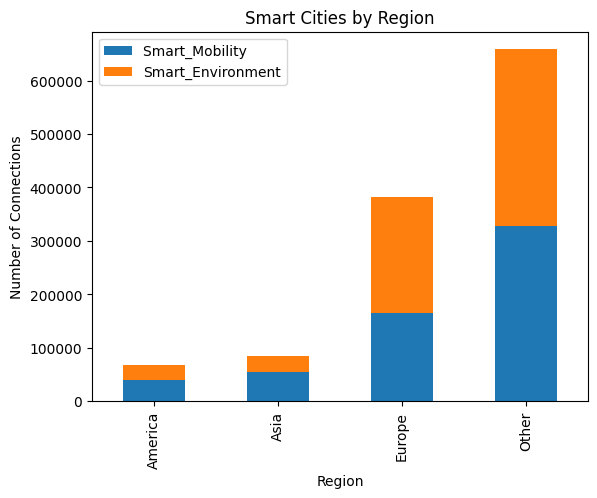

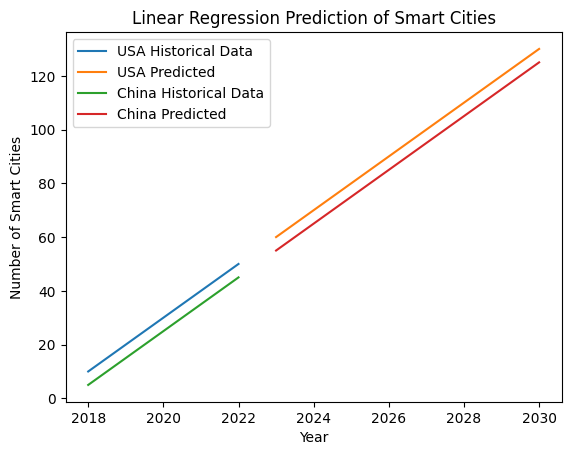

In [17]:
fig, ax = plt.subplots()
region_data.plot(kind='bar', x='Region', stacked=True, ax=ax)
ax.set_title('Smart Cities by Region')
ax.set_ylabel('Number of Connections')
plt.show()

years_future = np.arange(2023, 2031).reshape(-1, 1)
pred_usa_future = model_usa.predict(years_future)
pred_china_future = model_china.predict(years_future)

plt.figure()
plt.plot(years, usa_smart_cities, label='USA Historical Data')
plt.plot(years_future, pred_usa_future, label='USA Predicted')
plt.plot(years, china_smart_cities, label='China Historical Data')
plt.plot(years_future, pred_china_future, label='China Predicted')
plt.xlabel('Year')
plt.ylabel('Number of Smart Cities')
plt.title('Linear Regression Prediction of Smart Cities')
plt.legend()
plt.show()